In [3]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
import requests
import json

In [30]:
df = pd.read_excel(r"C:\Users\juand\OneDrive\Documentos\Proyecto Modelo Codigo\api-monitoreo-financiero\src\data\PIB2.xlsx", thousands= '.')
df.head()

,Año,Datos
0,2005,337958
1,2006,381604
2,2007,428506
3,2008,476554
4,2009,501574


In [31]:
df.shape

(18, 2)

In [32]:
df.isnull().sum() 

Año      0
Datos    0
dtype: int64

In [33]:
px.line(df, x ='Año', y = 'Datos', title= "Producto Interno Bruto")

In [37]:
df['ds'] = pd.to_datetime(df['Año'], format='%Y')


In [46]:
print(df['ds'])
df['ds'] = df['ds'] + pd.offsets.MonthEnd(0)
df_mes = df.groupby(['ds'])['Datos'].last().reset_index()
df['y'] = pd.to_numeric(df['Datos'])

0    2005-01-31
1    2006-01-31
2    2007-01-31
3    2008-01-31
4    2009-01-31
5    2010-01-31
6    2011-01-31
7    2012-01-31
8    2013-01-31
9    2014-01-31
10   2015-01-31
11   2016-01-31
12   2017-01-31
13   2018-01-31
14   2019-01-31
15   2020-01-31
16   2021-01-31
17   2022-01-31
Name: ds, dtype: datetime64[ns]


In [50]:
print(df)


      Datos         ds        y
0    337958 2005-01-31   337958
1    381604 2006-01-31   381604
2    428506 2007-01-31   428506
3    476554 2008-01-31   476554
4    501574 2009-01-31   501574
5    544060 2010-01-31   544060
6    619023 2011-01-31   619023
7    666507 2012-01-31   666507
8    714093 2013-01-31   714093
9    762903 2014-01-31   762903
10   804692 2015-01-31   804692
11   863782 2016-01-31   863782
12   920471 2017-01-31   920471
13   987791 2018-01-31   987791
14  1060068 2019-01-31  1060068
15   997742 2020-01-31   997742
16  1192586 2021-01-31  1192586
17  1462522 2022-01-31  1462522


In [51]:
m = Prophet()
m.fit(df)

23:48:06 - cmdstanpy - INFO - Chain [1] start processing
23:48:07 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)

In [56]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2005-01-31,3.018932e+05,2.204477e+05,3.870310e+05
1,2006-01-31,3.603816e+05,2.783185e+05,4.422631e+05
2,2007-01-31,4.006630e+05,3.257806e+05,4.810285e+05
3,2008-01-31,4.227587e+05,3.426521e+05,5.009058e+05
4,2009-01-31,5.242179e+05,4.417779e+05,6.054619e+05
...,...,...,...,...
378,2023-01-27,-1.317925e+06,-1.399434e+06,-1.239452e+06
379,2023-01-28,-2.740445e+05,-3.583833e+05,-1.941820e+05
380,2023-01-29,5.219638e+05,4.449651e+05,6.029728e+05
381,2023-01-30,1.048296e+06,9.724279e+05,1.126521e+06


C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\juand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



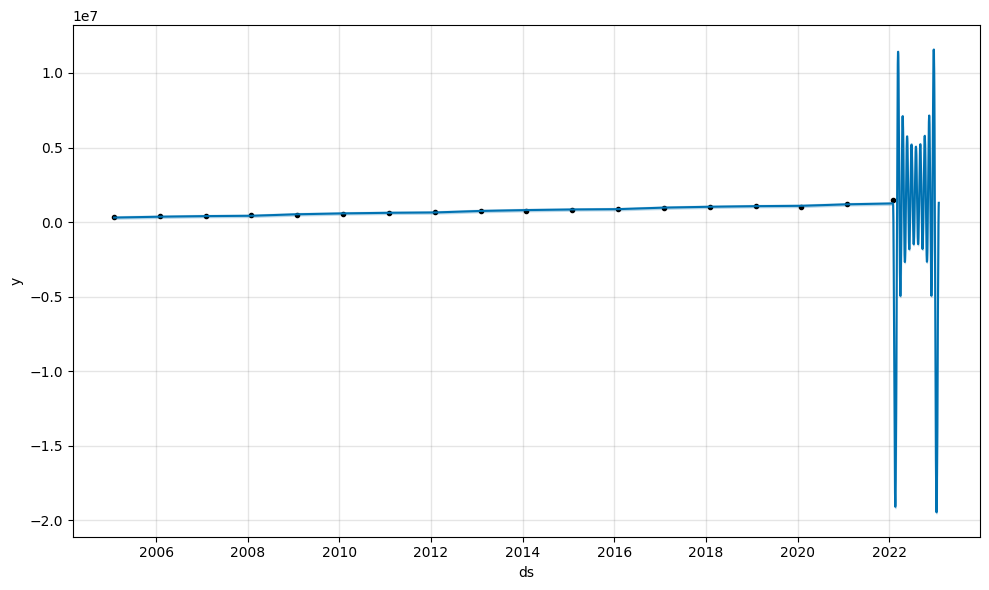

In [57]:
figi = m.plot(forecast)